# LOOP UNROLLING PREDICTION

### IMPORT NECESSARY LIBRARIES

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

## DATASET INITIALIZATION

In [5]:
dataset=pd.read_csv("Dataset.csv")

In [6]:
dataset.head(10)

,LOOPS,UF,NE,TIME
0,100,1,100,1.265
1,100,2,50,1.266
2,100,4,25,1.234
3,100,5,20,1.250
4,100,10,10,1.234
5,100,20,5,1.250
6,100,25,4,1.218
7,100,50,2,1.249
8,100,100,1,1.234
9,250,1,250,3.078


In [7]:
dataset.describe()

,LOOPS,UF,NE,TIME
count,1550.000000,1550.000000,1550.000000,1550.000000
mean,10458.967742,800.996774,900.220645,132.296835
std,6874.912070,2251.162270,2497.838131,88.424480
min,100.000000,1.000000,1.000000,1.218000
25%,6000.000000,15.000000,16.250000,74.752000
50%,8700.000000,85.000000,100.000000,110.739000
75%,13000.000000,500.000000,523.750000,163.277500
max,28000.000000,28000.000000,28000.000000,371.037000


### SPLIT DATA INTO INPUT AND OUTPUT SETS

In [4]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,3].values

### SAMPLE DATA VALUES

In [5]:
X[:2]

array([[100,   1, 100],
       [100,   2,  50]], dtype=int64)

In [6]:
y[:2]

array([1.265, 1.266])

### SPLIT DATASET INTO TRAIN AND TEST SET

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=0)

#### SAMPLE TEST DATASET

In [8]:
X_test[:2]

array([[23000,   575,    40],
       [22000,  2750,     8]], dtype=int64)

In [9]:
y_test[:2]

array([297.212, 295.367])

### SCALING OF THE DATASET

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### AFTER SCALING DATASET SAMPLES

In [11]:
X_test[:2]

array([[ 1.22861758, -0.09594237, -0.34201666],
       [ 1.11637049,  0.74471518, -0.3530647 ]])

In [12]:
y_test[:2]

array([297.212, 295.367])

## MACHINE LEARNING MODEL IPLEMENTATIONS

### 1. MULTI LINEAR REFRESSION

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

In [16]:
mlr_diff

,Actual value,Predicted value
0,297.212,294.373613
1,295.367,281.815814
2,9.107,8.055738
3,292.680,281.457540
4,111.052,114.527805
...,...,...
162,88.198,88.974316
163,1.234,-0.266591
164,364.833,358.889773
165,303.274,293.908812


<AxesSubplot:>

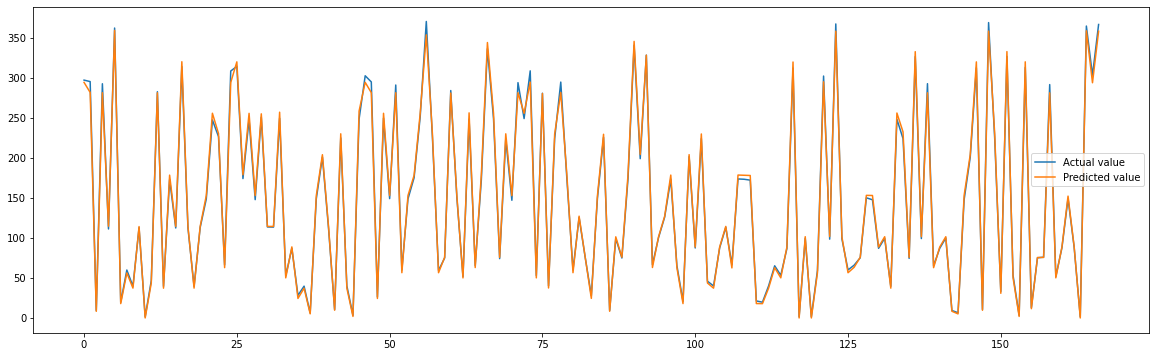

In [17]:
mlr_diff.plot(figsize=(20,6))

In [18]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)*100

print("Results of MLR:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of MLR:
MAE: 4.117922857429091
MSE: 27.544832691752468
RMSE: 5.248317129495175
R-Squared: 99.76242552823933



## 2. SVR

In [19]:
from sklearn.svm import SVR
svregressor = SVR(kernel = 'rbf')
svregressor.fit(X_train, y_train)

SVR()

In [20]:
y_predictsv = svregressor.predict(X_test)

In [21]:
svr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predictsv})

In [22]:
svr_diff

,Actual value,Predicted value
0,297.212,266.225470
1,295.367,242.988824
2,9.107,42.565596
3,292.680,260.490656
4,111.052,115.917115
...,...,...
162,88.198,113.478120
163,1.234,42.242308
164,364.833,265.971933
165,303.274,262.156002


<AxesSubplot:>

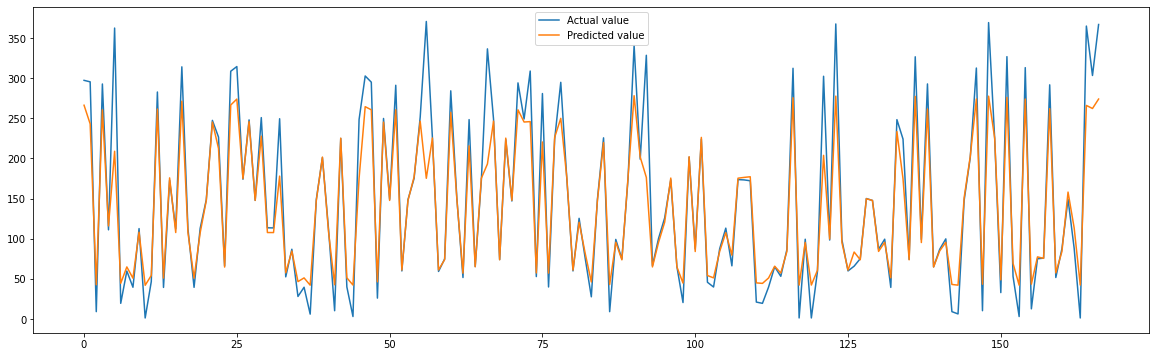

In [23]:
svr_diff.plot(figsize=(20,6))

In [24]:
mae = metrics.mean_absolute_error(y_test, y_predictsv)
mse = metrics.mean_squared_error(y_test, y_predictsv)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_predictsv)*100

print("Results of SVR:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of SVR:
MAE: 20.885797833771708
MSE: 1399.2283501566342
RMSE: 37.406260841691115
R-Squared: 87.9316407588655


## Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
drregressor = DecisionTreeRegressor(random_state = 0)
drregressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
y_predictdr = drregressor.predict(X_test)

In [27]:
dr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predictdr})

In [28]:
dr_diff

,Actual value,Predicted value
0,297.212,307.755
1,295.367,293.368
2,9.107,9.451
3,292.680,294.883
4,111.052,112.505
...,...,...
162,88.198,86.480
163,1.234,1.250
164,364.833,369.644
165,303.274,301.902


<AxesSubplot:>

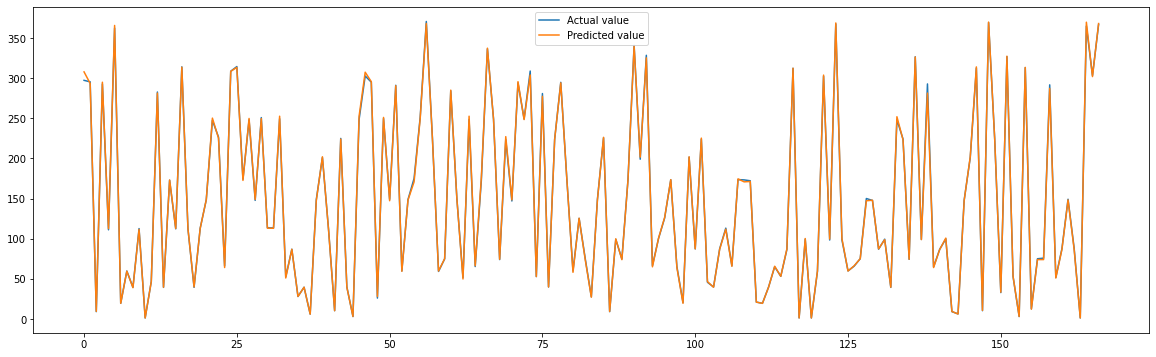

In [29]:
dr_diff.plot(figsize=(20,6))

In [30]:
mae = metrics.mean_absolute_error(y_test, y_predictdr)
mse = metrics.mean_squared_error(y_test, y_predictdr)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_predictdr)*100

print("Results of DTR:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of DTR:
MAE: 1.1445688622754482
MSE: 3.684810748502993
RMSE: 1.9195860878072109
R-Squared: 99.96821846852693


## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [32]:
y_predictrf = rfregressor.predict(X_test)

In [33]:
rfr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predictrf})

In [34]:
rfr_diff

,Actual value,Predicted value
0,297.212,305.7484
1,295.367,293.8976
2,9.107,9.3151
3,292.680,295.0220
4,111.052,111.8343
...,...,...
162,88.198,87.1284
163,1.234,1.2498
164,364.833,368.6060
165,303.274,302.5566


<AxesSubplot:>

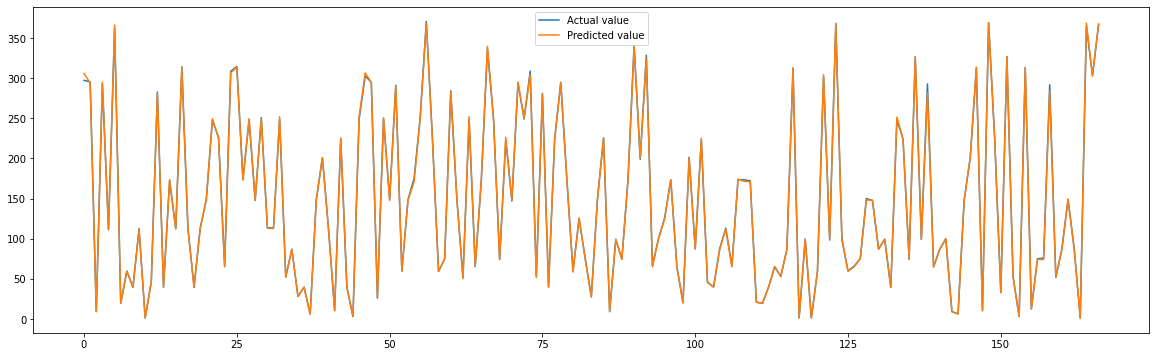

In [35]:
rfr_diff.plot(figsize=(20,6))

In [36]:
mae = metrics.mean_absolute_error(y_test, y_predictrf)
mse = metrics.mean_squared_error(y_test, y_predictrf)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_predictrf)*100

print("Results of RFR:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of RFR:
MAE: 1.04411377245509
MSE: 3.224901919880243
RMSE: 1.795801191635712
R-Squared: 99.97218518701241


## RIDGE MODEL

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state = 0)
ridge.fit(X_train, y_train)

Ridge(random_state=0)

In [38]:
y_predictridge = ridge.predict(X_test)

In [39]:
ridge_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predictridge})

In [40]:
ridge_diff

,Actual value,Predicted value
0,297.212,294.119491
1,295.367,281.612635
2,9.107,8.271455
3,292.680,281.221058
4,111.052,114.594604
...,...,...
162,88.198,89.101050
163,1.234,-0.040976
164,364.833,358.548444
165,303.274,293.686670


<AxesSubplot:>

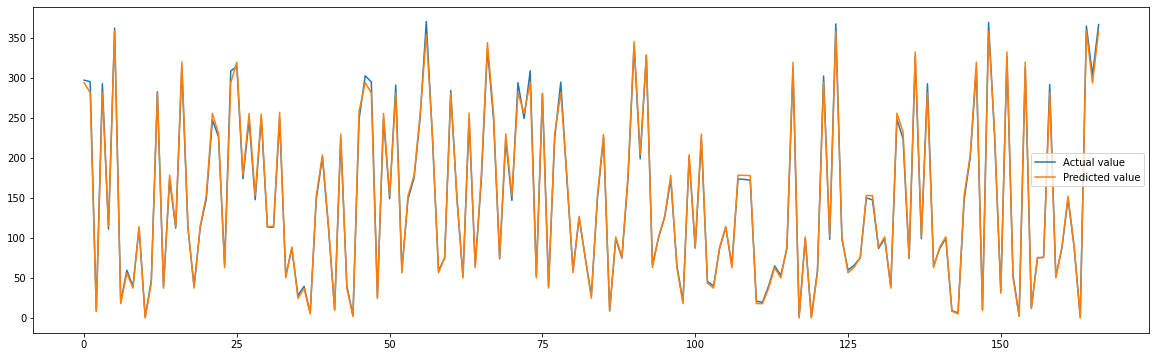

In [41]:
ridge_diff.plot(figsize=(20,6))

In [42]:
mae = metrics.mean_absolute_error(y_test, y_predictridge)
mse = metrics.mean_squared_error(y_test, y_predictridge)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_predictridge)*100

print("Results of RIDGE:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of RIDGE:
MAE: 4.070707540713643
MSE: 27.477440576699745
RMSE: 5.24189284292418
R-Squared: 99.76300678594068
